# Testando funções

**Implementados**

**Em testes**

**Planejados**

**Problemas**



In [1]:
# Mostra todos os resultados da célula, não apenas o último
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"
# Truque para consertar caminhos do jupyter: variável __file__ não é definida em IPYTHON.
import project_path
from datetime import datetime
import os
import sys
import getpass
import pandas as pd
import numpy as np
from importlib import reload

from astropy import units as u
from pytz import timezone

sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0])))
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "radiotelescope")))

In [2]:
import radiotelescope
import radiotelescope.netutils as netutils

In [3]:
dir(radiotelescope)

['CallistoSpectrometerBackend',
 'GNURadioBackend',
 'Instrument',
 'LinuxBox',
 'RTLSDRpowerBackend',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'backend',
 'misc',
 'multiprocess',
 'netutils',
 'utils']

In [4]:
reload(radiotelescope)

<module 'radiotelescope' from '/home/lbarosi/BAROSI/HOME/6000_PYTHONIA/2_Doing/radiotelescope/radiotelescope/__init__.py'>

### Netutils

In [5]:
IP = netutils.get_ip(interface="WAN")
IP
netutils.get_MAC()
netutils.get_OS()
netutils.get_netmask(IP = IP)
netutils.get_subnet(IP = IP)

'192.168.15.49'

'd8:77:8b:fe:35:20'

'Linux'

'255.255.255.0'

'192.168.15.49/24'

In [6]:
df = netutils.get_raspberry(IP=IP)
df
rasp = netutils.report_raspberry(df)
rasp
netutils.get_remote_MAC(IP=rasp[0])

,host,addr,addrtype,vendor
4,2,192.168.15.81,ipv4,NaN
5,2,B8:27:EB:E8:A8:D4,mac,Raspberry Pi Foundation


Encontrados 1 dispositivos raspberry.
Rasberry 2 

Endereço IP: 192.168.15.81
Endereço MAC: B8:27:EB:E8:A8:D4


array(['192.168.15.81'], dtype=object)

'B8:27:EB:E8:A8:D4'

### Controller

In [19]:
local_01 = radiotelescope.LinuxBox(
                    name="pergamon", 
                    user="bingo", 
                    remote_port=22, 
                    remote_IP = "192.168.15.81", 
                    local_folder = "./teste/",
                    remote_folder = "~/SDR/"
                    ).get_info().connect()
local_01.remote.run(command="ls -la")
#local_01.scan_LAN()
#local_01.sinc_files();

Verificando dados da máquina local:
É preciso especificar interface ou IP.
IP: None
MAC: d8:77:8b:fe:35:20
OS: Linux
Comando executado com sucesso.
INPUT: ls -la | OUTPUT: total 64

INPUT: ls -la | OUTPUT: drwxr-xr-x 8 bingo bingo 4096 Sep  6 07:43 .

INPUT: ls -la | OUTPUT: drwxr-xr-x 5 root  root  4096 May  6 16:19 ..

INPUT: ls -la | OUTPUT: drwxr-xr-x 3 bingo bingo 4096 May  7 20:25 .astropy

INPUT: ls -la | OUTPUT: -rw------- 1 bingo bingo 4523 May  8 15:10 .bash_history

INPUT: ls -la | OUTPUT: -rw-r--r-- 1 bingo bingo  220 May  6 15:33 .bash_logout

INPUT: ls -la | OUTPUT: -rw-r--r-- 1 bingo bingo 3523 May  6 15:33 .bashrc

INPUT: ls -la | OUTPUT: drwx------ 3 bingo bingo 4096 Sep  6 07:41 .config

INPUT: ls -la | OUTPUT: -rw-r--r-- 1 bingo bingo  462 May  8 22:47 .gr_fftw_wisdom

INPUT: ls -la | OUTPUT: -rw-r--r-- 1 bingo bingo    0 May  8 14:53 .gr_fftw_wisdom.lock

INPUT: ls -la | OUTPUT: drwxr-xr-x 3 bingo bingo 4096 May  7 19:24 .local

INPUT: ls -la | OUTPUT: -rw-r--r-- 1 

['total 64\n',
 'drwxr-xr-x 8 bingo bingo 4096 Sep  6 07:43 .\n',
 'drwxr-xr-x 5 root  root  4096 May  6 16:19 ..\n',
 'drwxr-xr-x 3 bingo bingo 4096 May  7 20:25 .astropy\n',
 '-rw------- 1 bingo bingo 4523 May  8 15:10 .bash_history\n',
 '-rw-r--r-- 1 bingo bingo  220 May  6 15:33 .bash_logout\n',
 '-rw-r--r-- 1 bingo bingo 3523 May  6 15:33 .bashrc\n',
 'drwx------ 3 bingo bingo 4096 Sep  6 07:41 .config\n',
 '-rw-r--r-- 1 bingo bingo  462 May  8 22:47 .gr_fftw_wisdom\n',
 '-rw-r--r-- 1 bingo bingo    0 May  8 14:53 .gr_fftw_wisdom.lock\n',
 'drwxr-xr-x 3 bingo bingo 4096 May  7 19:24 .local\n',
 '-rw-r--r-- 1 bingo bingo 1670 May  6 15:33 .mkshrc\n',
 '-rw-r--r-- 1 bingo bingo  807 May  6 15:33 .profile\n',
 '-rw------- 1 bingo bingo  834 May  8 14:53 .python_history\n',
 'drwxr-xr-x 2 bingo bingo 4096 Aug 31 17:02 SDR\n',
 'drwx------ 2 bingo bingo 4096 May 14 07:01 .ssh\n',
 'drwxr-xr-x 2 bingo bingo 4096 Sep  6 07:44 teste\n']

## Instrument

In [8]:
import pytz as tz
lat= -7.211637 * u.deg;
lon= -35.908138 * u.deg;
elev= 553 * u.m
Alt= 84
Az=0
fwhm = 15
timezone = tz.timezone("America/Recife")
minihorn = radiotelescope.Instrument(name='Uirapuru', lon=lon, lat=lat, elev=elev, timezone=timezone, 
                      verbose=True, Alt=Alt, Az=Az, fwhm = fwhm)

## Backend

### RTLSDR

In [10]:
modes = {"SKY":"01", "COLD":"02"}
SDR_01 = radiotelescope.RTLSDRpowerBackend(controller=local_01, instrument=minihorn, modes = modes, name="SDR_01");

In [23]:
SDR_01._get_filenames(path="SDR")
SDR_01.filenames

,files,mode
timestamps,,


In [18]:
observe_dict = {"duration":"1m", 
                "band":["800M", "1200M"], 
                "bandwidth":"1M", 
                "gain":"50", 
                "integration":"1s",
                "mode":"01"}
SDR_01.observe_mp(**observe_dict)

rtl_power -f 800M:1200M:1M -g50 -i 1s -e 1m ./teste/SDR_01_20220906_074334_01.csv


In [18]:
modes = {"SKY":"01", "COLD":"02"}
SDR_01 = radiotelescope.RTLSDRpowerBackend(controller=local_01, instrument=minihorn, modes = modes, name="SDR_01");
SDR_01._get_filenames();
SDR_01.filenames
df = SDR_01.load_measurement()
SDR_01.csv2fit(filename=SDR_01.filenames.files.to_list()[2], overwrite=True)
SDR_01._get_filenames();
SDR_01.load_measurement(extension="fit")
observe_dict = {"duration":"1m", 
                "band":["800M", "1200M"], 
                "bandwidth":"1M", 
                "gain":"50", 
                "integration":"1s",
                "mode":"01"}
SDR_01.observe_mp(**observe_dict)
#SDR_01.observe(**observe_dict)
SDR_01.save_measurement()

,files,mode
timestamps,,


Função cv2df chamada sem argumentos.


IndexError: list index out of range

### Callisto

In [ ]:
meas_mode = ["overview", "fit"]
mode = { "SKY":"59", "COLD":"01", "WARM":"02" "HOT":"03"}
observe_dict = { "duration": "30m", mode = "SKY", "measurement" = "overview"}

### GNURadio

In [35]:
import numpy
import matplotlib.pyplot as plt

In [36]:
ff = numpy.fromfile(open("../radiotelescope/GNURadio/dummy.out"), dtype=numpy.float32)

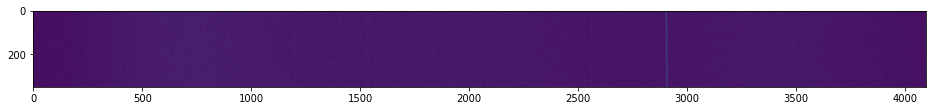

In [39]:
fig, ax = plt.subplots(figsize=(16,6))
ax.imshow(ff.reshape((-1, 4096)))
plt.show();

In [41]:
freq_center = 1040e6
sample_rate = 2.048e6
vector_length = 4096
freq_min = freq_center - sample_rate/2
freq_max = freq_center - sample_rate/2
freqs = np.linspace(freq_min, freq_max, vector_length)

In [9]:

teste = np.empty((2,3))

In [10]:
teste

array([[4.65057087e-310, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [11]:
teste[0]

array([4.65057087e-310, 0.00000000e+000, 0.00000000e+000])

In [12]:
START = datetime.now()

In [13]:
END = datetime.now()

In [16]:
decim_rate = 1000

In [18]:
(END - START).total_seconds()/decim_rate

0.005688878

In [20]:
np.linspace(0, 100, 1000).size

1000